In [2]:
import numpy as np
import pandas as pd

In [5]:
water = pd.read_csv("water.txt", sep='\t')

In [6]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [7]:
water.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


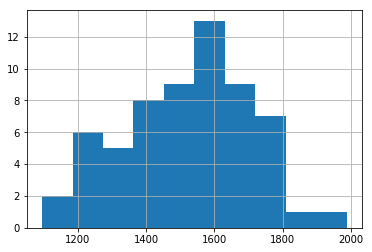

In [11]:
import matplotlib.pyplot as plt
water.mortality.hist()
plt.show()

In [8]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [50]:
mean_mortality = water.mortality.mean()
mortality_mean_std = water.mortality.std(ddof=1)/np.sqrt(len(water.mortality))

In [52]:
print("95% confidence interval", _tconfint_generic(mean_mortality, mortality_mean_std,
                                                                   (len(water.mortality) - 1), 
                                                                   0.05, 'two-sided'))


95% confidence interval (1476.0833413552848, 1572.2117406119285)


In [53]:
data = water[water.location == "South"]

In [54]:
mean_south_mortality = data.mortality.mean()
mortality_south_mean_std = data.mortality.std(ddof=1)/np.sqrt(len(data.mortality))
mean_south_hardness = data.hardness.mean()
hardness_south_mean_std = data.hardness.std(ddof=1)/np.sqrt(len(data.hardness))

In [55]:
print ("95% confidence interval", _tconfint_generic(mean_south_mortality, mortality_south_mean_std,
                                                                         (len(data.mortality) - 1), 
                                                                          0.05, 'two-sided'))
print ("95% confidence interval", _tconfint_generic(mean_south_hardness, hardness_south_mean_std,
                                                                         (len(data.hardness) - 1), 
                                                                         0.05, 'two-sided'))

95% confidence interval (1320.1517462936238, 1433.463638321761)
95% confidence interval (53.467198692036106, 86.07126284642544)


In [56]:
data = water[water.location == "North"]

In [42]:
mean_north_mortality = data.mortality.mean()
mean_north_hardness = data.hardness.mean()

In [43]:
print ("95% confidence interval", _zconfint_generic(mean_north_mortality, 
                                                                  data.mortality.std(ddof=1)/np.sqrt(len(data.mortality)), 
                                                                  0.05, 'two-sided'))
print ("95% confidence interval", _zconfint_generic(mean_north_hardness, 
                                                                  data.hardness.std(ddof=1)/np.sqrt(len(data.hardness)), 
                                                                  0.05, 'two-sided'))

95% confidence interval (1588.2335708894593, 1678.9664291105405)
95% confidence interval (21.741789085882083, 39.058210914117915)


In [66]:
print("95% confidence interval", _zconfint_generic(mean_mortality, 
                                                                  1/np.sqrt(len(data.mortality)), 
                                                                  0.05, 'two-sided'))

95% confidence interval (1523.8162466034769, 1524.4788353637364)


In [74]:
import scipy.stats
np.ceil((scipy.stats.norm.ppf(1-0.05/2) / 0.1)**2)

385.0